<a href="https://colab.research.google.com/github/rachidboukhoudmi/EfficientNetB2/blob/main/EfficientNetB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Necessary Dependencies
import numpy as np
import pandas as pd
!pip install utils
from utils import *
from glob import glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
from tqdm import tqdm
import tensorflow as tf
# DenseNet Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
import keras
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import roc_curve, auc
print('Started')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Started


In [ ]:
cd /content/gdrive/MyDrive/Amina

/content/gdrive/MyDrive/Amina


In [ ]:
path, dirs, files = next(os.walk("Knee X-ray Images/0Normal"))
file_count = len(files)
print('Normal:',file_count)
path, dirs, files = next(os.walk("Knee X-ray Images/1Doubtful"))
file_count = len(files)
print('Doubtful',file_count)
path, dirs, files = next(os.walk("Knee X-ray Images/2Mild"))
file_count = len(files)
print('Mild:',file_count)
path, dirs, files = next(os.walk("Knee X-ray Images/3Moderate"))
file_count = len(files)
print('Moderate',file_count)
path, dirs, files = next(os.walk("Knee X-ray Images/4Severe"))
file_count = len(files)
print('Severe',file_count)

Normal: 514
Doubtful 791
Mild: 696
Moderate 663
Severe 618


In [ ]:
image_size = (224, 224)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
    "Knee X-ray Images",
    validation_split=0.20,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_df = tf.keras.preprocessing.image_dataset_from_directory(
    "Knee X-ray Images",
    validation_split=0.2,
    subset="validation",
    seed=333,
    image_size=image_size,
    batch_size=batch_size,
)

Found 3362 files belonging to 5 classes.
Using 2690 files for training.
Found 3362 files belonging to 5 classes.
Using 672 files for validation.


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=None, fill_mode='reflect',
        interpolation='bilinear', seed=None, fill_value=0.0),
                layers.experimental.preprocessing.RandomCrop(height= 224, width = 224, seed=None),
    ]
)

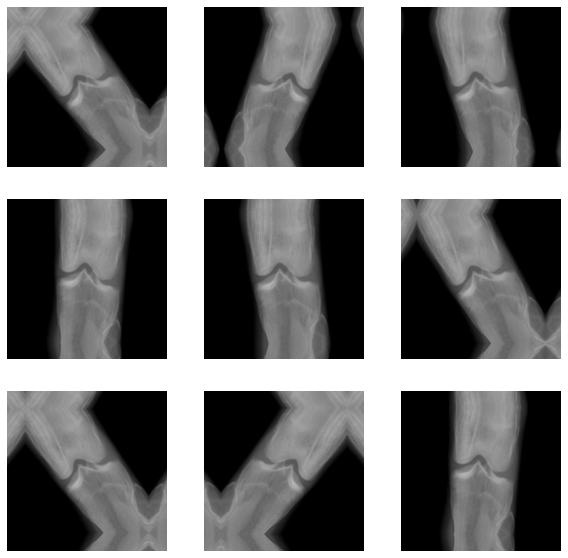

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_df.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_df = train_df.prefetch(buffer_size=32)
val_df = val_df.prefetch(buffer_size=32)

prefetch(buffer_size=32): This function is used to prepare the next batch of data while the model is training on the current batch. This reduces the idle time between batches and improves the overall training efficiency by keeping the pipeline fed with data.

buffer_size=32: This means the pipeline will fetch up to 32 batches of data in advance and store them in a buffer, ensuring the next batch is ready when needed.

In [ ]:
# Hyperparameters
IMG_IND=224
IMG_SHAPE = (IMG_IND,IMG_IND,3)
LOSS = BinaryCrossentropy() # Not un-weighted
IMG_SIZE = (224, 224)
SEED = 2
BATCH_SIZE = 16

In [ ]:
def get_callbacks(model_name):
    callbacks =[]
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model.{model_name}.h5', verbose=1, monitor='val_loss',mode='min',save_best_only=True)
    callbacks.append(checkpoint)
    anne = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=2, min_lr=0.0000001,min_delta=0.00001,mode='auto')
    callbacks.append(anne)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
    callbacks.append(earlystop)
    return callbacks

In [ ]:
OPTIMIZER =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
base_model=tf.keras.applications.EfficientNetB2(include_top=False, weights="imagenet",input_shape=IMG_SHAPE)
base_model.trainable = True
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(5, activation='Softmax',name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss ='categorical_cross_entropy',optimizer=OPTIMIZER,metrics=['accuracy'])
#model.summary()

31801344/31790344 [==============================] - 0s 0us/step


In [ ]:
callbacks = get_callbacks('EfficientNetB2')
history = model.fit( train_df,epochs=50,
                    validation_data= val_df,
                    callbacks=[callbacks])

Epoch 1/50
85/85 [==============================] - ETA: 0s - loss: 3.0071 - accuracy: 0.2063
Epoch 1: val_loss improved from inf to 3.10712, saving model to model.EfficientNetB2.h5
85/85 [==============================] - 273s 3s/step - loss: 3.0071 - accuracy: 0.2063 - val_loss: 3.1071 - val_accuracy: 0.2351 - lr: 0.0010
Epoch 2/50
85/85 [==============================] - ETA: 0s - loss: 2.9914 - accuracy: 0.1955
Epoch 2: val_loss improved from 3.10712 to 3.09434, saving model to model.EfficientNetB2.h5
85/85 [==============================] - 45s 520ms/step - loss: 2.9914 - accuracy: 0.1955 - val_loss: 3.0943 - val_accuracy: 0.2277 - lr: 0.0010
Epoch 3/50
85/85 [==============================] - ETA: 0s - loss: 2.9912 - accuracy: 0.1993
Epoch 3: val_loss improved from 3.09434 to 3.09311, saving model to model.EfficientNetB2.h5
85/85 [==============================] - 44s 511ms/step - loss: 2.9912 - accuracy: 0.1993 - val_loss: 3.0931 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 4/50
85

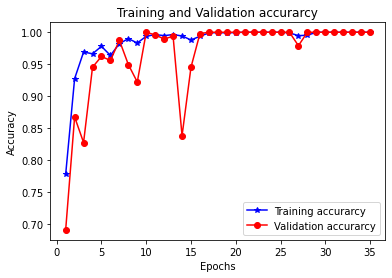

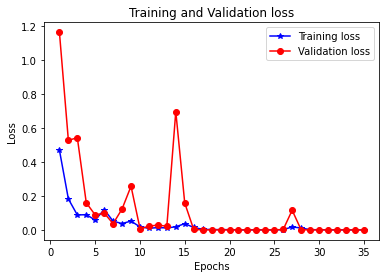

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b-*', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r-o', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b-*', label='Training loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model('model.EfficientNetB2.keras')

In [ ]:
results = model.evaluate(val_df, steps=len(val_df), verbose=1)

8/8 [==============================] - 3s 97ms/step - loss: 0.2044 - accuracy: 0.9800
